In [47]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-pollution-level/Air Pollution.csv


## Import Data

In [48]:
data = pd.read_csv('../input/air-pollution-level/Air Pollution.csv')

## Data Understanding

In [49]:
data.head()

,Country Name,City,Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Updated Year
0,Afghanistan,Kabul,2019,119.77,NaN,NaN,18.0,NaN,NaN,2022
1,Albania,Durres,2015,NaN,17.65,26.63,NaN,NaN,83.961187,2022
2,Albania,Durres,2016,14.32,24.56,24.78,NaN,NaN,87.932605,2022
3,Albania,Elbasan,2015,NaN,NaN,23.96,NaN,NaN,97.853881,2022
4,Albania,Elbasan,2016,NaN,NaN,26.26,NaN,NaN,96.049636,2022


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32191 entries, 0 to 32190
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country Name                32191 non-null  object 
 1   City                        32191 non-null  object 
 2   Year                        32191 non-null  int64  
 3   PM2.5 (μg/m3)               15048 non-null  float64
 4   PM10 (μg/m3)                21109 non-null  float64
 5   NO2 (μg/m3)                 22200 non-null  float64
 6   PM25 temporal coverage (%)  7275 non-null   float64
 7   PM10 temporal coverage (%)  5381 non-null   float64
 8   NO2 temporal coverage (%)   19890 non-null  float64
 9   Updated Year                32191 non-null  int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 2.5+ MB


**Data Information**

Country Name - It includes the names of the countries.

City - It includes the name of the town.

Year - It includes the year in which data is.

PM2.5 (μg/m3) - The Particulate Matter 2.5 pollution level in micrograms per cubic meter.

PM10 (μg/m3) - The Particulate Matter is 10 levels in microgram per cubic meter.

NO2 (μg/m3) - The Nitrogen Dioxide level in microgram per cubic meter.

PM2.5 temporal coverage (%) - The Particulate Matter 2.5 pollution level in percentage.

PM10 temporal coverage (%) - The Particulate Matter 10 pollution level in percentage.

NO2 temporal coverage (%)- The Nitrogen Dioxide level in percentage.

Updated Year - Year in which data is updated.

In [51]:
data.max()

Country Name                  Viet Nam
City                          Živinice
Year                              2021
PM2.5 (μg/m3)                    191.9
PM10 (μg/m3)                     540.0
NO2 (μg/m3)                     210.68
PM25 temporal coverage (%)       100.0
PM10 temporal coverage (%)       100.0
NO2 temporal coverage (%)        100.0
Updated Year                      2022
dtype: object

In [52]:
data.min()

Country Name                  Afghanistan
City                             A Coruna
Year                                 2000
PM2.5 (μg/m3)                        0.01
PM10 (μg/m3)                         1.04
NO2 (μg/m3)                           0.0
PM25 temporal coverage (%)            0.0
PM10 temporal coverage (%)       2.568493
NO2 temporal coverage (%)        1.923077
Updated Year                         2016
dtype: object

In [53]:
data.nunique()

Country Name                   118
City                          6874
Year                            21
PM2.5 (μg/m3)                 4749
PM10 (μg/m3)                  5081
NO2 (μg/m3)                   4633
PM25 temporal coverage (%)    2307
PM10 temporal coverage (%)    2084
NO2 temporal coverage (%)     6496
Updated Year                     3
dtype: int64

## Data Preparation

In this article [Air Quality Levels and Health Risk Assessment of Particulate Matters in Abuja Municipal Area, Nigeria](http://dx.doi.org/10.3390/atmos11080817) we can indicate that air pollution are have 6 levels, with PM 2.5 and PM 10 as indicators.

In [54]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

labelencoder=LabelEncoder()

object_list = data.select_dtypes(include='object').columns
for column in object_list:
    data[column]=labelencoder.fit_transform(data[column])

### Handling Missing Value

In [55]:
numeric_list = data.select_dtypes(include='float64').columns

for column in numeric_list:
    data[column].fillna(data[column].mean(), inplace=True)

In [56]:
category=['1','2', '3', '4', '5', '6']
data['Level']=pd.cut(data['PM10 (μg/m3)'], [0,54, 154, 254, 354, 424, 540], labels=category)

In [57]:
data.head()

,Country Name,City,Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Updated Year,Level
0,0,2782,2019,119.77000,30.533252,20.619336,18.000000,90.5835,93.696804,2022,1
1,1,1613,2015,22.92032,17.650000,26.630000,90.794096,90.5835,83.961187,2022,1
2,1,1613,2016,14.32000,24.560000,24.780000,90.794096,90.5835,87.932605,2022,1
3,1,1667,2015,22.92032,30.533252,23.960000,90.794096,90.5835,97.853881,2022,1
4,1,1667,2016,22.92032,30.533252,26.260000,90.794096,90.5835,96.049636,2022,1


In [58]:
import matplotlib.pyplot as plt
level = data['Level'].value_counts()
print(level)

1    30131
2     1817
3      215
4       22
6        4
5        2
Name: Level, dtype: int64


In [59]:
level = data['Level'].value_counts()

In [60]:
data = data.apply(pd.to_numeric)

<AxesSubplot:>

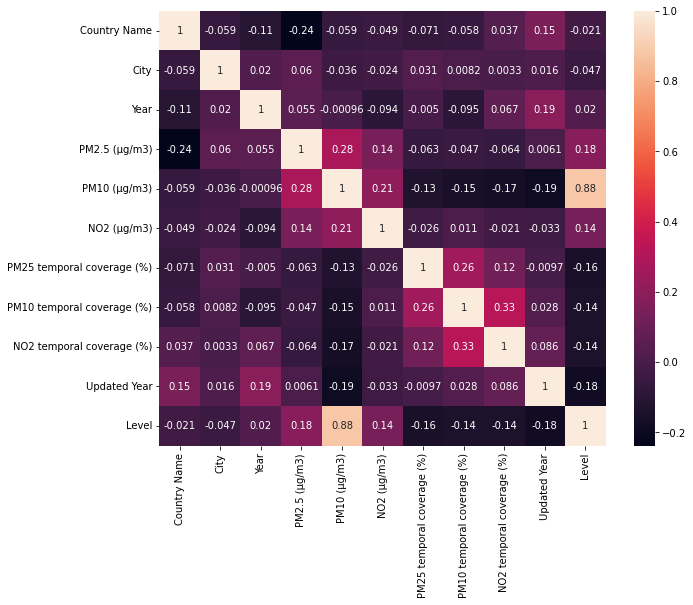

In [61]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot = True)


In [62]:
data.drop(columns = ['Country Name', 'City'], inplace=True)

## Modelling

In [63]:
feature = data.drop('Level', axis=1)
target = data['Level']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target,test_size=0.25,random_state=10)

In [64]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler

#### Decision Tree

In [65]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier(class_weight='balanced', max_depth=3)
model_dt.fit(X_train,y_train)
y_pred = model_dt.predict(X_test)

In [66]:
from sklearn.metrics import classification_report
print('Classification Report')
print(classification_report(y_test, y_pred, labels =[1,2,3,4,5,6], target_names=['Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5','Level 6']))

Classification Report
              precision    recall  f1-score   support

     Level 1       1.00      1.00      1.00      7562
     Level 2       1.00      1.00      1.00       435
     Level 3       0.00      0.00      0.00        47
     Level 4       0.00      0.00      0.00         2
     Level 5       0.00      0.00      0.00         0
     Level 6       1.00      1.00      1.00         2

    accuracy                           0.99      8048
   macro avg       0.50      0.50      0.50      8048
weighted avg       0.99      0.99      0.99      8048



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1

#### Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(random_state=1, n_estimators=10)
model_rf.fit(X_train,y_train)
y_pred = model_rf.predict(X_test)

In [68]:
print('Classification Report')
print(classification_report(y_test, y_pred, labels =[1,2,3,4,5,6], target_names=['Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5','Level 6']))

Classification Report
              precision    recall  f1-score   support

     Level 1       1.00      1.00      1.00      7562
     Level 2       1.00      1.00      1.00       435
     Level 3       0.94      0.96      0.95        47
     Level 4       1.00      0.50      0.67         2
     Level 5       0.00      0.00      0.00         0
     Level 6       0.00      0.00      0.00         2

   micro avg       1.00      1.00      1.00      8048
   macro avg       0.66      0.58      0.60      8048
weighted avg       1.00      1.00      1.00      8048



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1

#### KNeuralNeighbors

In [69]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Accuracy:',r2_score(y_test,y_pred))

Accuracy: 0.9649591281999748


#### Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42, solver = 'liblinear')
logreg_model = logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [71]:
print('Classification Report')
print(classification_report(y_test, y_pred, labels =[1,2,3,4,5,6], target_names=['Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5','Level 6']))


Classification Report
              precision    recall  f1-score   support

     Level 1       1.00      1.00      1.00      7562
     Level 2       0.89      0.95      0.92       435
     Level 3       0.00      0.00      0.00        47
     Level 4       0.00      0.00      0.00         2
     Level 5       0.00      0.00      0.00         0
     Level 6       0.00      0.00      0.00         2

   micro avg       0.99      0.99      0.99      8048
   macro avg       0.31      0.33      0.32      8048
weighted avg       0.99      0.99      0.99      8048



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1